# How to implement KNN from scratch with Python

1. https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn/
2. https://stats.stackexchange.com/questions/463499/machine-learning-kneighborsregressor-train-score-1

In [27]:
# core libs
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# charts
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.neighbors import KNeighborsClassifier

In [28]:
# Data
from sklearn.datasets import fetch_california_housing
california_housing = fetch_california_housing(as_frame=True)
df = california_housing.frame

In [29]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


MedInc - median income in block group
HouseAge - median house age in a block group
AveRooms - the average number of rooms (provided per household)
AveBedrms - the average number of bedrooms (provided per household)
Population - block group population
AveOccup - the average number of household members
Latitude - block group latitude
Longitude - block group longitude
MedHouseVal - median house value for California districts (hundreds of thousands of dollars)

<AxesSubplot:>

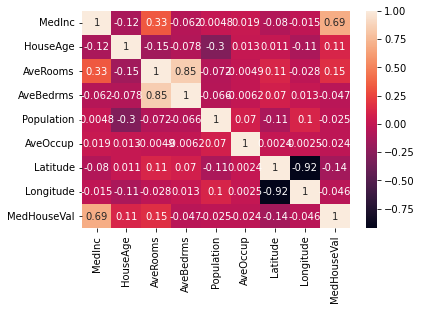

In [30]:
# Correlation
import seaborn as sn
import matplotlib.pyplot as plt

sn.heatmap(df.corr(), annot=True)

In [31]:
X = df.drop(['MedHouseVal'], axis=1)
y = df.MedHouseVal

In [32]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000


## Regression with K-Nearest Neighbors

In [33]:
# Split into train and test sets

from sklearn.model_selection import train_test_split
SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=SEED)

In [34]:
# Standartization

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit
scaler.fit(X_train)

# Scale
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

col_names = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
scaled_df = pd.DataFrame(X_test, columns=col_names)
scaled_df.describe().T

,count,mean,std,min,25%,50%,75%,max
MedInc,5160.0,-0.016059,0.991671,-1.774632,-0.696956,-0.192866,0.435980,5.842113
HouseAge,5160.0,0.013795,0.991857,-2.188261,-0.840224,0.032036,0.666407,1.855852
AveRooms,5160.0,-0.010900,1.084250,-1.895233,-0.423629,-0.089476,0.248431,52.485627
AveBedrms,5160.0,-0.001878,1.290755,-1.360290,-0.210606,-0.113563,0.001264,75.138022
Population,5160.0,-0.007072,0.962946,-1.242020,-0.564792,-0.233178,0.251557,12.857276
AveOccup,5160.0,-0.012046,0.136058,-0.154164,-0.056718,-0.023848,0.015110,6.696928
Latitude,5160.0,-0.027852,1.003589,-1.455901,-0.809192,-0.668603,0.962228,2.911728
Longitude,5160.0,0.028029,1.002011,-2.330363,-1.086840,0.556207,0.795922,2.498898


In [37]:
# Training and predicting

from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor()
regressor.fit(X_train, y_train)

predicted = regressor.predict(X_test)

In [54]:
# Measure result

from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_test, predicted)
mse = mean_squared_error(y_test, predicted)
rmse = mean_squared_error(y_test, predicted, squared=False)
r2 = regressor.score(X_test, y_test)

print(f'mae {mae}')
print(f'mse {mse}')
print(f'rmse {rmse}')
print(f'r2 {r2}')

mae 0.4460739527131783
mse 0.4316907430948294
rmse 0.6570317671884894
r2 0.6737569252627673


In [53]:
# Try to find best params

from sklearn.model_selection import GridSearchCV
grid_search_cv = GridSearchCV(regressor, {'n_neighbors': range(5,25)})
grid_search_cv.fit(X_train, y_train)
# regressor_2 = KNeighborsRegressor(n_neighbors=12)
# regressor_2.fit(X_train, y_train)

updated_predictions = grid_search_cv.best_estimator_.predict(X_test)
# updated_predictions = regressor_2.predict(X_test)

mae = mean_absolute_error(y_test, updated_predictions)
mse = mean_squared_error(y_test, updated_predictions)
rmse = mean_squared_error(y_test, updated_predictions, squared=False)
r2 = regressor_2.score(X_test, y_test)

print(f'mae {mae}')
print(f'mse {mse}')
print(f'rmse {rmse}')
print(f'r2 {r2}')

mae 0.44038533963178295
mse 0.4202432078854215
rmse 0.6482616816420831
r2 0.6887495617137436


## Classification using K-Nearest Neighbors